##  과제 내용
다음 단계에 따라 분석을 진행하고 주석과 함께 코드로 정리하세요.
1. 데이터 불러오기
2. pandas를 이용해 train.csv 파일을 불러옵니다.
3. 기초 EDA
.info(), .describe(), .head() 등을 사용해 데이터 구조와 기본 통계 정보를 확인합니다.

4. 결측치 탐색 및 처리
각 컬럼의 결측치 개수를 확인하고, Age, Embarked 등 결측치가 있는 컬럼에 적절한 방식으로 값을 채워 넣습니다.
5. 범주형 변수 분석
Sex, Pclass, Embarked 등 범주형 변수의 고유값(unique), 빈도수(value_counts) 등을 분석합니다.
6. 데이터 시각화
seaborn, matplotlib을 활용해 주요 변수의 분포나 관계를 시각화합니다.
    예시: 성별에 따른 생존률 시각화
7. 인코딩 연습
8. 범주형 변수(Sex, Embarked)를 수치형으로 변환합니다.
9. 전처리된 데이터 저장
10. 전처리가 완료된 데이터를 to_csv()로 새로운 CSV 파일로 저장합니다. 예: titanic_processed.csv

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)

In [6]:
titanic_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Python_colab/Web Service/ML/data/titanic/train.csv")
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [10]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [11]:
titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)
# Age 컬럼을 중간값으로 결측치 채우기

/tmp/ipython-input-11-2867912573.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(),inplace=True)


In [12]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)
# Embarked 컬럼은 최빈값으로 채우기

/tmp/ipython-input-12-1229518655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)


In [13]:
# Cabin 값은 지워버리기
titanic_df.drop('Cabin', axis=1, inplace=True)

In [14]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [15]:
titanic_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [16]:
# 범주형 변수 고유값 분석
print("Sex:", titanic_df['Sex'].unique())
print("Pclass:", titanic_df['Pclass'].unique())
print("Embarked:", titanic_df['Embarked'].unique())

Sex: ['male' 'female']
Pclass: [3 1 2]
Embarked: ['S' 'C' 'Q']


In [17]:
# 범주형 변수 빈도수 확인
print("Sex:\n", titanic_df['Sex'].value_counts())
print("Pclass:\n", titanic_df['Pclass'].value_counts())
print("Embarked:\n", titanic_df['Embarked'].value_counts())

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64
Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Embarked:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


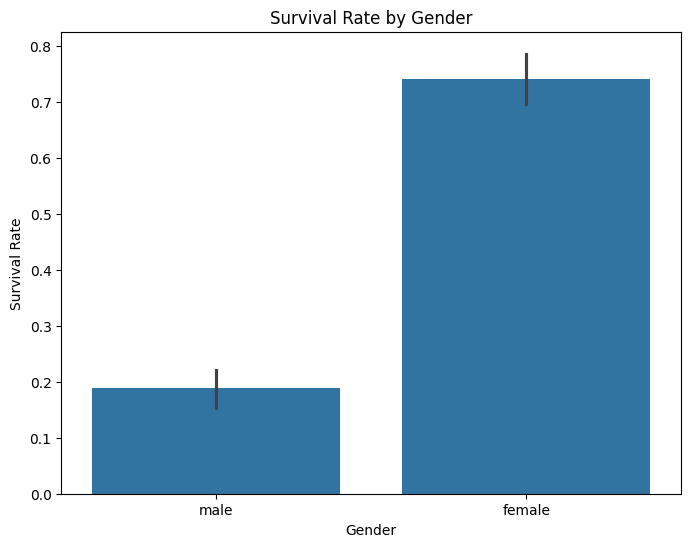

In [18]:
# 성별에 따른 생존률
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

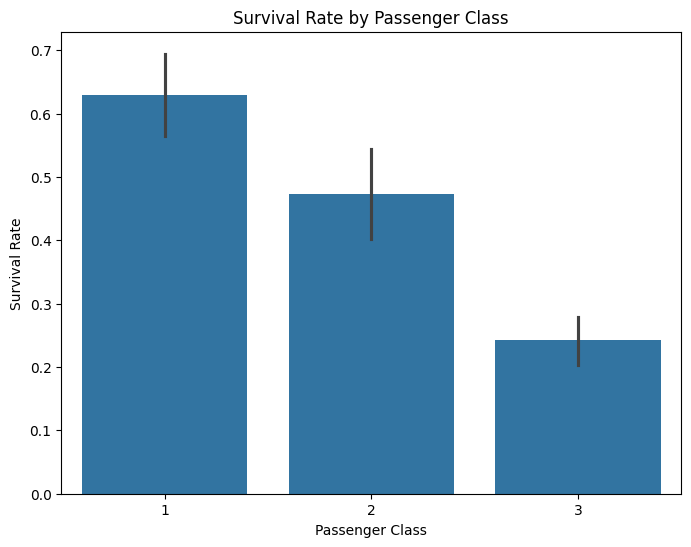

In [19]:
# 클래스 별 생존률
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

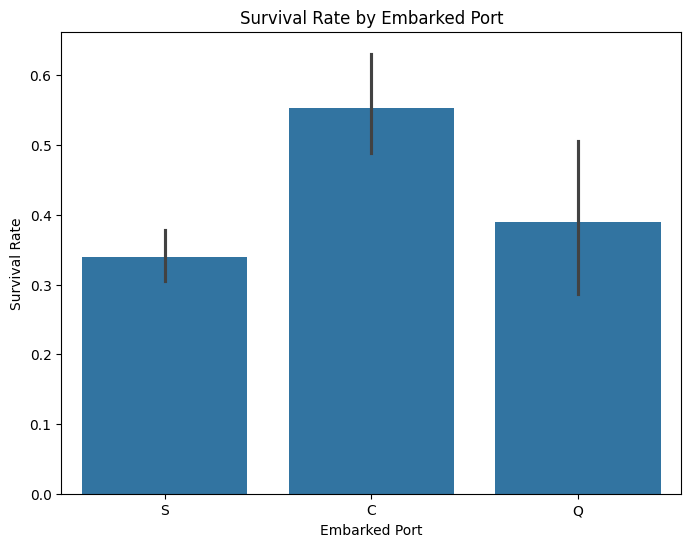

In [20]:
# Embarked : 승선항 , 어디에서 배탔는지에 따른 생존률
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=titanic_df)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

In [21]:
# 범주형 변수 인코딩 (수치형 변환)
# Sex: male=0, female=1로 변환
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

In [42]:
# Embarked: 원핫 인코딩 방식 사용 (dummy 변수 생성)
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

In [43]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


In [44]:
titanic_df.to_csv('titanic_processed.csv', index=False)

In [45]:
print("문자열 컬럼 확인:", titanic_df.select_dtypes(include='object').columns.tolist())

문자열 컬럼 확인: ['Name', 'Ticket']


In [63]:
df = pd.read_csv('titanic_processed.csv')
df = df.drop(df.select_dtypes(include='object').columns, axis=1, errors='ignore')

## 모델 학습 및 평가지표

In [55]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [68]:
# 학습/테스트 데이터 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=2025
    )

In [69]:
# 사용할 분류 모델
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=15, random_state=2025),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2025),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42)
}

results = {}
roc_curves = {}

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


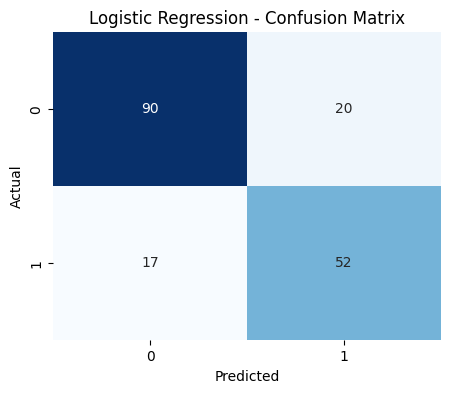

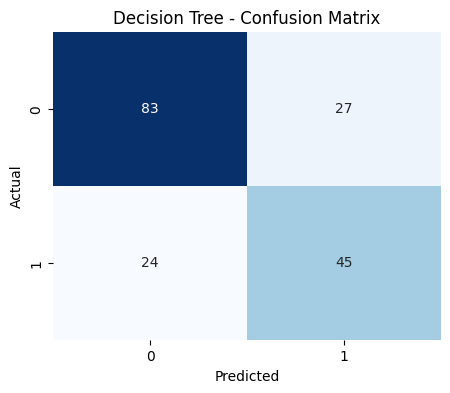

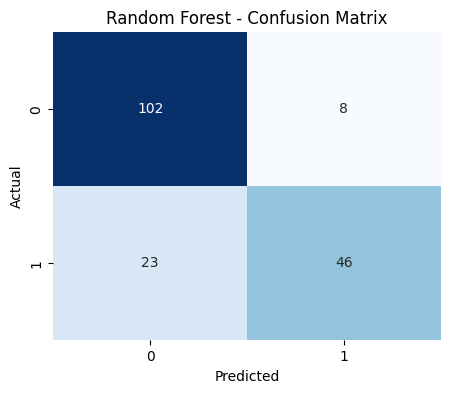

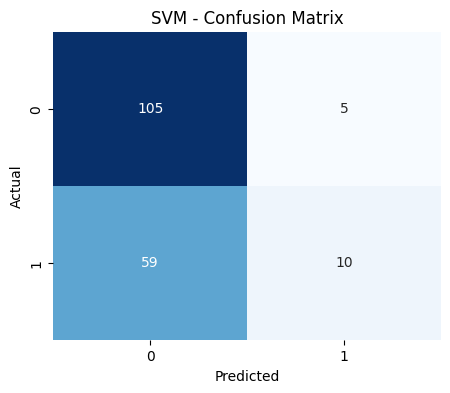

In [70]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]  # ROC 계산용 (SVM은 probability=True 필요)

    # 평가 지표 계산
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = [acc, prec, rec, f1]

    # 혼동 행렬 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve 계산
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    roc_curves[name] = (fpr, tpr, roc_auc)

## ROC Curve 시각화

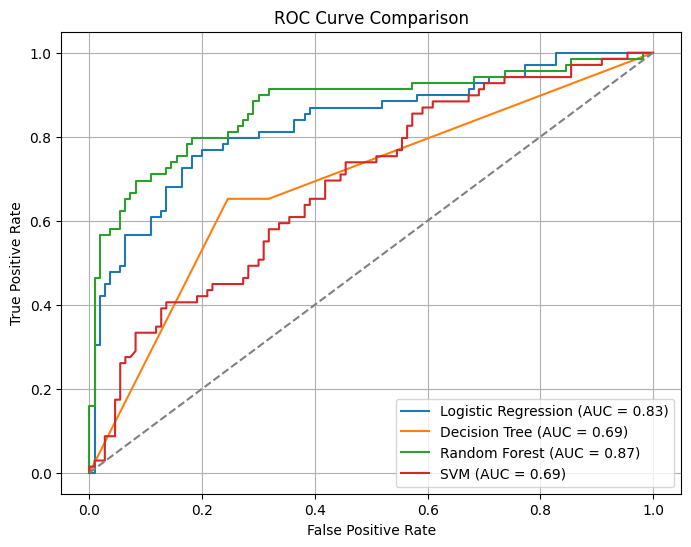

In [71]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


## 모델별 성능 요약 출력

In [72]:
summary = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-score']).T
print("=== 모델별 성능 요약 ===")
print(summary)

=== 모델별 성능 요약 ===
                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.793296   0.722222  0.753623  0.737589
Decision Tree        0.715084   0.625000  0.652174  0.638298
Random Forest        0.826816   0.851852  0.666667  0.747967
SVM                  0.642458   0.666667  0.144928  0.238095
